In [129]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Input : amount of food in each day

Output : happy or sad

Text(0.5, 1.0, 'Test')

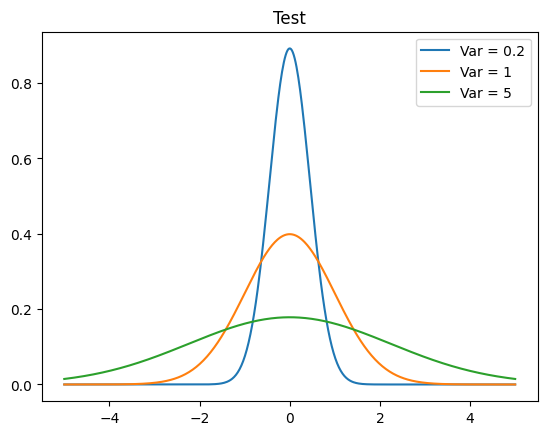

In [130]:
def N(x, mean, var):
    sd = np.sqrt(var)
    return (np.exp((-(x-mean)**2)/(2*sd**2)))/(sd*np.sqrt(2*np.pi))

X = np.linspace(-5, 5, 500)
for var in [0.2, 1, 5]:
    y = N(X, 0, var)
    plt.plot(X, y, label=f"Var = {var}")

plt.legend()
plt.title('Test')


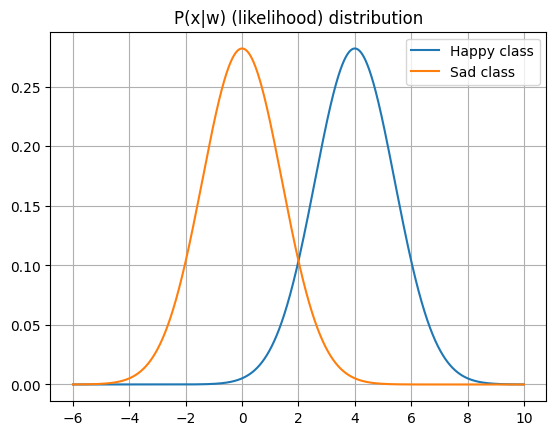

In [131]:
X = np.linspace(-6, 10, 16*100000)
P_x_w1 = N(X, 4, 2)
P_x_w2 = N(X, 0, 2)

plt.plot(X, P_x_w1, label='Happy class')
plt.plot(X, P_x_w2, label='Sad class')

plt.title('P(x|w) (likelihood) distribution')
plt.legend()
plt.grid()
plt.show()

In [132]:
HAPPY_PROP = 0.5
SAD_PROP = 1-HAPPY_PROP

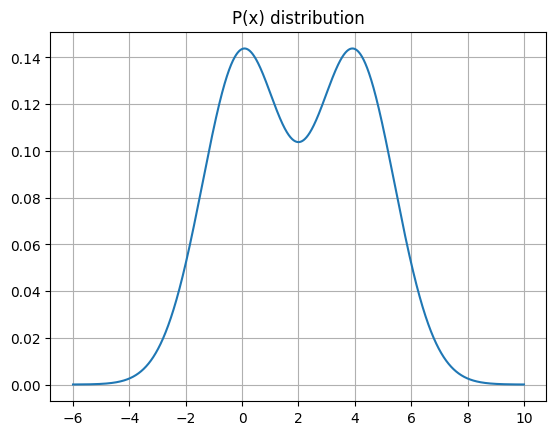

In [133]:
# Assume P(w_1) and P(w_2) is 0.5
P_x = (HAPPY_PROP*P_x_w1)+(SAD_PROP*P_x_w2)
plt.plot(X, P_x)
plt.title(f"P(x) distribution")
plt.grid()
plt.show()

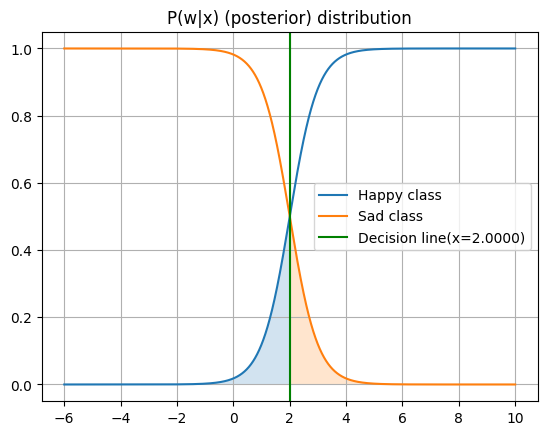

In [134]:
P_w1_x = ((P_x_w1)*HAPPY_PROP)/P_x
P_w2_x = ((P_x_w2)*SAD_PROP)/P_x

temp = P_w1_x / P_w2_x
temp = np.where(temp > 1, temp, 0)
temp = np.where(temp < 1, temp, 2)
decision_boundary_idx = np.where(temp[:-1] != temp[1:])[0][0]+1
decision_boundary = X[decision_boundary_idx]

plt.title(f"P(w|x) (posterior) distribution")
plt.plot(X, P_w1_x, label='Happy class')
plt.plot(X, P_w2_x, label='Sad class')

plt.axvline(decision_boundary, label=f'Decision line(x={decision_boundary:.4f})', c='green')

plt.fill_between(x=X,
                 y1=P_w1_x,
                 alpha=0.2,
                 where=X<decision_boundary)
plt.fill_between(x=X,
                 y1=P_w2_x,
                 alpha=0.2,
                 where=X>decision_boundary)


plt.grid()
plt.legend()
plt.show()